# Introduction to Julia

Today's IDRE tutorial is based on Professor [Hua Zhou](http://hua-zhou.github.io/index.html)'s lecture notes.

If you want to follow along:

Visit https://github.com/kose-y/JuliaWorkshop. Virtual enviornment is provided at https://mybinder.org/v2/gh/kose-y/JuliaWorkshop/HEAD.

<img src="./julia_logo.png" align="center" width="400"/>


## What's Julia?

> Julia is a high-level, high-performance dynamic programming language for technical computing, with syntax that is familiar to users of other technical computing environments

* History:
  - Project started in 2009. First public release in 2012 
  - Creators: Jeff Bezanson, Alan Edelman, Stefan Karpinski, Viral Shah
  - First major release v1.0 was released on Aug 8, 2018
  - Current stable release v1.8.5 (as of Apr 6, 2023)

* Aim to solve the notorious **two language problem**: Prototype code goes into high-level languages like R/Python, production code goes into low-level language like C/C++. 

    Julia aims to:
> Walks like Python. Runs like C.

<img src="./julia_vs_otherlang.png" align="center" width="600"/>

See <https://julialang.org/benchmarks/> for the details of benchmark.

* Write high-level, abstract code that closely resembles mathematical formulas
    - yet produces fast, low-level machine code that has traditionally only been generated by static languages.

* Julia is more than just "Fast R" or "Fast Matlab"
    - Performance comes from features that work well together.  
    - You can't just take the magic dust that makes Julia fast and sprinkle it on [language of choice]

## Learning resources

1. The (free) online course [Introduction to Julia](https://juliaacademy.com/p/intro-to-julia), by Jane Herriman. 

2. Cheat sheet: [The Fast Track to Julia](https://juliadocs.github.io/Julia-Cheat-Sheet/).  

3. Browse the Julia [documentation](https://docs.julialang.org/en).  
bm
4. For Matlab users, read [Noteworthy Differences From Matlab](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-MATLAB-1).  

    For R users, read [Noteworthy Differences From R](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-R-1).  

    For Python users, read [Noteworthy Differences From Python](https://docs.julialang.org/en/v1/manual/noteworthy-differences/?highlight=matlab#Noteworthy-differences-from-Python-1).  

5. The [Learning page](http://julialang.org/learning/) on Julia's website has pointers to many other learning resources.  

## Julia REPL (Read-Evaluation-Print-Loop)

The `Julia` REPL, or `Julia` shell, has at least five modes.

1. **Default mode** is the Julian prompt `julia>`. Type backspace in other modes to enter default mode.    

2. **Help mode** `help?>`. Type `?` to enter help mode. `?search_term` does a fuzzy search for `search_term`.  

3. **Shell mode** `shell>`. Type `;` to enter shell mode.  

4. **Package mode** `(@v1.8) pkg>`. Type `]` to enter package mode for managing Julia packages (install, uninstall, update, ...).

5. **Search mode** `(reverse-i-search)`. Press `ctrl+R` to enter search model. 

6. With `RCall.jl` package installed, we can enter the **R mode** by typing `$` (shift+4) at Julia REPL.

Some survival commands in Julia REPL:  
1. `exit()` or `Ctrl+D`: exit Julia.

2. `Ctrl+C`: interrupt execution.

3. `Ctrl+L`: clear screen.

0. Append `;` (semi-colon) to suppress displaying output from a command. Same as Matlab.

0. `include("filename.jl")` to source a Julia code file.

## Seek help

* Online help from REPL: `?function_name`.

* Google.

* Julia documentation: <https://docs.julialang.org/en/>.

* Look up source code: `@edit sin(œÄ)`.

* Discourse: <https://discourse.julialang.org>.

* Friends.

## Which IDE?

* Julia homepage lists many choices: Juno, VS Code, Vim, ...

* Unfortunately at the moment there are no mature RStudio- or Matlab-like IDE for Julia yet.

* For dynamic document, e.g., homework, I recommend [Jupyter Notebook](https://jupyter.org/install.html) or [JupyterLab](http://jupyterlab.readthedocs.io/en/stable/). 

* For extensive Julia coding, myself has been happily using the editor [VS Code](https://code.visualstudio.com) with extensions `Julia` and `VS Code Jupyter Notebook Previewer` installed. 

## Julia package system

* Each Julia package is a Git repository. Each Julia package name ends with `.jl`. E.g., `Distributions.jl` package lives at <https://github.com/JuliaStats/Distributions.jl>.   
Google search with `PackageName.jl` usually leads to the package on github.com. 

* The package ecosystem is rapidly maturing; a complete list of **registered** packages (which are required to have a certain level of testing and documentation) is at [http://pkg.julialang.org/](http://pkg.julialang.org/).

* For example, the package called `Distributions.jl` is added with
```julia
# in Pkg mode
(@v1.9) pkg> add Distributions
```
and "removed" (although not completely deleted) with
```julia
# in Pkg mode
(@v1.9) pkg> rm Distributions
```
* The package manager provides a dependency solver that determines which packages are actually required to be installed.

* **Non-registered** packages are added by cloning the relevant Git repository. E.g.,
```julia
# in Pkg mode
(@v1.9) pkg> add https://github.com/OpenMendel/ADMIXTURE.jl
```

* A package needs only be added once, at which point it is downloaded into your local depot, which is `.julia/packages` directory in your home directory by default. 

In [1]:
versioninfo()

Julia Version 1.9.3
Commit bed2cd540a1 (2023-08-24 14:43 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: macOS (arm64-apple-darwin22.4.0)
  CPU: 8 √ó Apple M2
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-14.0.6 (ORCJIT, apple-m1)
  Threads: 2 on 4 virtual cores


In [2]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()
Pkg.status()

  Activating project at `~/UCLA/JuliaWorkshop/01-juliaintro`
‚îå Warning: The active manifest file has dependencies that were resolved with a different julia version (1.8.5). Unexpected behavior may occur.
‚îî @ ~/UCLA/JuliaWorkshop/01-juliaintro/Manifest.toml:0


Status `~/UCLA/JuliaWorkshop/01-juliaintro/Project.toml`
  [6e4b80f9] BenchmarkTools v1.3.2
‚åÉ [31c24e10] Distributions v0.25.100
‚åÉ [6f49c342] RCall v0.13.17
  [37e2e46d] LinearAlgebra
  [9abbd945] Profile
  [2f01184e] SparseArrays
Info Packages marked with ‚åÉ have new versions available and may be upgradable.


In [3]:
readdir(Sys.islinux() ? ENV["JULIA_PATH"] * "/pkg/packages" : ENV["HOME"] * "/.julia/packages")

465-element Vector{String}:
 "ANSIColoredPrinters"
 "ARFFFiles"
 "ASL_jll"
 "AbstractFFTs"
 "AbstractLattices"
 "AbstractPlutoDingetjes"
 "AbstractTrees"
 "Adapt"
 "Animations"
 "Arpack"
 "Arpack_jll"
 "ArrayInterface"
 "ArrayInterfaceCore"
 ‚ãÆ
 "libigc_jll"
 "libpng_jll"
 "libsixel_jll"
 "libsodium_jll"
 "libvorbis_jll"
 "oneAPI"
 "oneAPI_Level_Zero_Headers_jll"
 "oneAPI_Level_Zero_Loader_jll"
 "oneAPI_Support_jll"
 "x264_jll"
 "x265_jll"
 "xkbcommon_jll"

* Directory of a specific package can be queried by `pathof()`:

In [4]:
pathof(Distributions)

LoadError: UndefVarError: `Distributions` not defined

* If you start having problems with packages that seem to be unsolvable, you may try just deleting your .julia directory and reinstalling all your packages. 

* Periodically, one should run `update` in Pkg mode, which checks for, downloads and installs updated versions of all the packages you currently have installed.

* `status` lists the status of all installed packages.

* Using functions in package.
```julia
using Distributions
```
This pulls all of the *exported* functions in the module into your local namespace, as you can check using the `whos()` command. An alternative is
```julia
import Distributions
```
Now, the functions from the Distributions package are available only using 
```julia
Distributions.<FUNNAME>
```
All functions, not only exported functions, are always available like this.



Load packages:

In [5]:
using BenchmarkTools, Distributions, RCall
using LinearAlgebra, Profile, SparseArrays

## Calling R from Julia

* The [`RCall.jl`](https://github.com/JuliaInterop/RCall.jl) package allows us to embed R code inside of Julia.

* There are also `PyCall.jl`, `MATLAB.jl`, `JavaCall.jl`, `CxxWrap.jl` packages for interfacing with other languages.

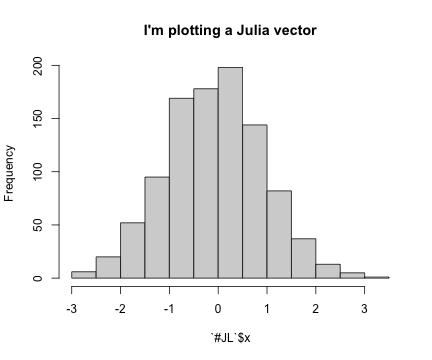

In [6]:
# x is in Julia workspace
x = randn(1000)

# $ is the interpolation operator
R"""
hist($x, main = "I'm plotting a Julia vector")
""";

‚îå Warning: RCall.jl: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
‚îî @ RCall ~/.julia/packages/RCall/aK5sD/src/io.jl:172


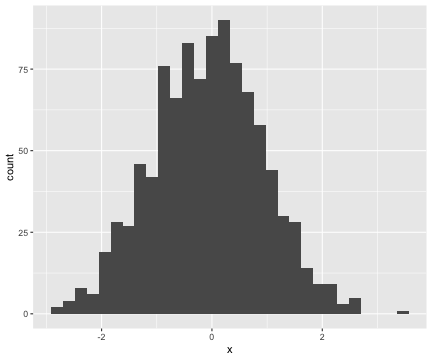

RObject{VecSxp}


In [7]:
R"""
library(ggplot2)

data = data.frame(x=$x)
ggplot(data, aes(x=x)) + geom_histogram()
"""

In [8]:
x = R"""
rnorm(10)
"""

RObject{RealSxp}
 [1]  1.20661311 -0.57175174 -2.29385438 -1.73846944  0.48062022  0.19864460
 [7]  0.83797555 -0.08547096  1.37010582  0.19463844


In [9]:
# collect R variable into Julia workspace
y = collect(x)

10-element Vector{Float64}:
  1.2066131095094692
 -0.5717517409820199
 -2.2938543769700206
 -1.7384694444205355
  0.48062022412840477
  0.19864459803840964
  0.8379755476361561
 -0.08547095984762512
  1.3701058163392041
  0.19463844244494918

* Access Julia variables in R REPL mode:
```julia
julia> x = rand(5) # Julia variable
R> y <- $x
```

* Pass Julia expression in R REPL mode:
```julia
R> y <- $(rand(5))
```

* Put Julia variable into R environment:
```julia
julia> @rput x
R> x
```

* Get R variable into Julia environment:
```julia
R> r <- 2
Julia> @rget r
```

* If you want to call Julia within R, check out the [`JuliaCall`](https://non-contradiction.github.io/JuliaCall//index.html) package.

## Some basic Julia code

In [10]:
# an integer, same as int in R
y = 1

1

In [11]:
# query type of a Julia object
typeof(y)

Int64

In [12]:
# a Float64 number, same as double in R
y = 1.0

1.0

In [13]:
typeof(y) 

Float64

In [14]:
# Greek letters:  `\pi<tab>`
œÄ

œÄ = 3.1415926535897...

In [15]:
typeof(œÄ)

Irrational{:œÄ}

In [16]:
# Greek letters:  `\theta<tab>`
Œ∏ = y + œÄ

4.141592653589793

In [17]:
# emoji! `\:kissing_cat:<tab>`
üòΩ = 5.0
üòΩ + 1

6.0

In [18]:
# `\alpha<tab>\hat<tab>`
Œ±ÃÇ = œÄ

œÄ = 3.1415926535897...

For a list of unicode symbols that can be tab-completed, see <https://docs.julialang.org/en/v1/manual/unicode-input/>. Or in the help mode, type `?` followed by the unicode symbol you want to input.

In [19]:
# vector of Float64 0s
x = zeros(5)

5-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [20]:
# vector Int64 0s
x = zeros(Int, 5)

5-element Vector{Int64}:
 0
 0
 0
 0
 0

In [21]:
# matrix of Float64 0s
x = zeros(5, 3)

5√ó3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [22]:
# matrix of Float64 1s
x = ones(5, 3)

5√ó3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [23]:
# define array without initialization
x = Matrix{Float64}(undef, 5, 3)

5√ó3 Matrix{Float64}:
 NaN             3.16e-322     NaN
   0.0           5.0e-324        0.0
   2.22893e-314  2.22893e-314    2.22893e-314
   2.23794e-314  2.23794e-314    2.23794e-314
   5.0e-324      5.0e-324        5.0e-324

In [24]:
# fill a matrix by 0s
fill!(x, 0)

5√ó3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [25]:
# initialize an array to be constant 2.5
fill(2.5, (5, 3))

5√ó3 Matrix{Float64}:
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5

In [26]:
# rational number
a = 3//5

3//5

In [27]:
typeof(a)

Rational{Int64}

In [28]:
b = 3//7

3//7

In [29]:
a + b

36//35

In [30]:
# uniform [0, 1) random numbers
x = rand(5, 3)

5√ó3 Matrix{Float64}:
 0.506304  0.214164  0.822539
 0.885384  0.177035  0.954067
 0.421479  0.461891  0.508643
 0.434696  0.630742  0.445672
 0.169554  0.447198  0.832593

In [31]:
# uniform random numbers (in single precision)
x = rand(Float16, 5, 3)

5√ó3 Matrix{Float16}:
 0.2119  0.635   0.317
 0.1758  0.393   0.0781
 0.29    0.0718  0.778
 0.4321  0.865   0.3232
 0.2783  0.1411  0.3335

In [32]:
# random numbers from {1,...,5}
x = rand(1:5, 5, 3)

5√ó3 Matrix{Int64}:
 5  3  4
 5  1  2
 2  1  5
 2  1  1
 1  4  2

In [33]:
# standard normal random numbers
x = randn(5, 3)

5√ó3 Matrix{Float64}:
  1.38038   -0.133325   -1.16516
 -0.951771   0.0513271   0.510747
  1.18851    0.761165   -0.167351
  0.730708   1.16883    -2.00244
  0.292766   0.162692   -0.397745

In [34]:
# range
1:10

1:10

In [35]:
typeof(1:10)

UnitRange{Int64}

In [36]:
1:2:10

1:2:9

In [37]:
typeof(1:2:10)

StepRange{Int64, Int64}

In [38]:
# integers 1-10
x = collect(1:10)

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [39]:
# or equivalently
[1:10...]

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [40]:
# Float64 numbers 1-10
x = collect(1.0:10)

10-element Vector{Float64}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

In [41]:
# convert to a specific type
convert(Vector{Float64}, 1:10)

10-element Vector{Float64}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

## Matrices and vectors

### Dimensions

In [42]:
x = randn(5, 3)

5√ó3 Matrix{Float64}:
  0.921165   0.447846   0.049813
 -0.553293   1.41119    0.447368
 -0.501163  -0.840381  -0.773662
 -0.552027   1.26379   -0.791615
 -0.401976   0.987404  -0.478598

In [43]:
size(x)

(5, 3)

In [44]:
size(x, 1) # nrow() in R

5

In [45]:
size(x, 2) # ncol() in R

3

In [46]:
# total number of elements
length(x)

15

### Indexing

In [47]:
# 5 √ó 5 matrix of random Normal(0, 1)
x = randn(5, 5)

5√ó5 Matrix{Float64}:
  0.0332114  -1.15123   0.734306   0.275196   1.87448
  0.932209    0.37753  -1.11465    0.161691   0.143257
 -0.112152    1.35789  -0.276083   1.78855    0.933724
  1.89635     2.58046   0.953385  -1.84242   -0.0673248
 -0.962334    1.63263   0.788513  -1.36928    1.89434

In [48]:
# first column
x[:, 1]

5-element Vector{Float64}:
  0.03321137722753241
  0.9322090079430436
 -0.11215165644113931
  1.896350592228596
 -0.9623335715833422

In [49]:
# first row
x[1, :]

5-element Vector{Float64}:
  0.03321137722753241
 -1.151231136013792
  0.7343061892804938
  0.27519618341508784
  1.8744833621879944

In [50]:
# sub-array
x[1:2, 2:3]

2√ó2 Matrix{Float64}:
 -1.15123   0.734306
  0.37753  -1.11465

In [51]:
# getting a subset of a matrix creates a copy, but you can also create "views"
z = view(x, 1:2, 2:3)

2√ó2 view(::Matrix{Float64}, 1:2, 2:3) with eltype Float64:
 -1.15123   0.734306
  0.37753  -1.11465

In [52]:
# same as
@views z = x[1:2, 2:3]

2√ó2 view(::Matrix{Float64}, 1:2, 2:3) with eltype Float64:
 -1.15123   0.734306
  0.37753  -1.11465

In [53]:
# change in z (view) changes x as well
z[2, 2] = 0.0
x

5√ó5 Matrix{Float64}:
  0.0332114  -1.15123   0.734306   0.275196   1.87448
  0.932209    0.37753   0.0        0.161691   0.143257
 -0.112152    1.35789  -0.276083   1.78855    0.933724
  1.89635     2.58046   0.953385  -1.84242   -0.0673248
 -0.962334    1.63263   0.788513  -1.36928    1.89434

In [54]:
# y points to same data as x
y = x

5√ó5 Matrix{Float64}:
  0.0332114  -1.15123   0.734306   0.275196   1.87448
  0.932209    0.37753   0.0        0.161691   0.143257
 -0.112152    1.35789  -0.276083   1.78855    0.933724
  1.89635     2.58046   0.953385  -1.84242   -0.0673248
 -0.962334    1.63263   0.788513  -1.36928    1.89434

In [55]:
# x and y point to same data
pointer(x), pointer(y)

(Ptr{Float64} @0x000000010b471340, Ptr{Float64} @0x000000010b471340)

In [56]:
# changing y also changes x
y[:, 1] .= 0
x

5√ó5 Matrix{Float64}:
 0.0  -1.15123   0.734306   0.275196   1.87448
 0.0   0.37753   0.0        0.161691   0.143257
 0.0   1.35789  -0.276083   1.78855    0.933724
 0.0   2.58046   0.953385  -1.84242   -0.0673248
 0.0   1.63263   0.788513  -1.36928    1.89434

In [57]:
# create a new copy of data
z = copy(x)

5√ó5 Matrix{Float64}:
 0.0  -1.15123   0.734306   0.275196   1.87448
 0.0   0.37753   0.0        0.161691   0.143257
 0.0   1.35789  -0.276083   1.78855    0.933724
 0.0   2.58046   0.953385  -1.84242   -0.0673248
 0.0   1.63263   0.788513  -1.36928    1.89434

In [58]:
pointer(x), pointer(z)

(Ptr{Float64} @0x000000010b471340, Ptr{Float64} @0x0000000165439d40)

### Concatenate matrices

In [59]:
# 3-by-1 vector
[1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [60]:
# 1-by-3 array
[1 2 3]

1√ó3 Matrix{Int64}:
 1  2  3

In [61]:
# multiple assignment by tuple
x, y, z = randn(5, 3), randn(5, 2), randn(3, 5)

([1.5779659491663607 -0.19329857039003373 -1.0041876444725668; 1.0698191378141713 -1.366686218908209 -0.21512352598338222; ‚Ä¶ ; 1.5485355159859533 -0.4892816612860986 0.9122820899551081; -0.29808239896909644 0.7827615399352732 0.5990730356848961], [-0.23262603821331615 0.3235055485739677; 0.8855470951685941 1.3850057868938692; ‚Ä¶ ; 0.12358932502729891 0.14615074790000165; -1.90867644622582 -0.8551650573879929], [0.15772927495467323 0.9320501295014852 ‚Ä¶ -1.1765501936876885 0.6858301994993208; -1.4330493250236334 -1.6037736004023473 ‚Ä¶ -1.9208184408256752 -1.111486685693952; 0.11970319347858 -2.047330496184358 ‚Ä¶ 0.24929835878330414 -0.7857548712854757])

In [62]:
[x y] # 5-by-5 matrix

5√ó5 Matrix{Float64}:
  1.57797   -0.193299   -1.00419   -0.232626   0.323506
  1.06982   -1.36669    -0.215124   0.885547   1.38501
 -0.477832  -0.0566525  -0.780477   1.4011     2.17244
  1.54854   -0.489282    0.912282   0.123589   0.146151
 -0.298082   0.782762    0.599073  -1.90868   -0.855165

In [63]:
[x y; z] # 8-by-5 matrix

8√ó5 Matrix{Float64}:
  1.57797   -0.193299   -1.00419   -0.232626   0.323506
  1.06982   -1.36669    -0.215124   0.885547   1.38501
 -0.477832  -0.0566525  -0.780477   1.4011     2.17244
  1.54854   -0.489282    0.912282   0.123589   0.146151
 -0.298082   0.782762    0.599073  -1.90868   -0.855165
  0.157729   0.93205     0.740858  -1.17655    0.68583
 -1.43305   -1.60377    -1.24928   -1.92082   -1.11149
  0.119703  -2.04733     1.02664    0.249298  -0.785755

### Dot operation (broadcasting)

Dot operation in Julia is elementwise operation, similar to Matlab.

In [64]:
x = randn(5, 3)

5√ó3 Matrix{Float64}:
 -0.886764   1.71332    1.04241
  1.57554   -1.13636    0.360604
  0.518097  -0.519447  -1.27659
  0.409274  -0.346633   0.431413
 -0.994229  -0.494668  -0.8681

In [65]:
y = ones(5, 3)

5√ó3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [66]:
x .* y # same x * y in R

5√ó3 Matrix{Float64}:
 -0.886764   1.71332    1.04241
  1.57554   -1.13636    0.360604
  0.518097  -0.519447  -1.27659
  0.409274  -0.346633   0.431413
 -0.994229  -0.494668  -0.8681

In [67]:
x .^ (-2)

5√ó3 Matrix{Float64}:
 1.2717   0.340663  0.920294
 0.40285  0.774408  7.69023
 3.72544  3.70611   0.613613
 5.96997  8.32261   5.37297
 1.01164  4.08669   1.32697

In [68]:
sin.(x)

5√ó3 Matrix{Float64}:
 -0.775031   0.989861   0.863619
  0.999989  -0.907106   0.352839
  0.495228  -0.4964    -0.957034
  0.397943  -0.339733   0.418154
 -0.838339  -0.47474   -0.763102

### Basic linear algebra

In [69]:
x = randn(5)

5-element Vector{Float64}:
  1.5351039747476585
  0.17555786383736194
 -1.157866758244074
 -0.6541191407606809
  0.3198062184423235

In [70]:
# vector L2 norm
norm(x)

2.0635329108961913

In [71]:
# same as
sqrt(sum(abs2, x))

2.0635329108961913

In [72]:
y = randn(5) # another vector
# dot product
dot(x, y) # x' * y

-0.3288858551720347

In [73]:
# same as
x'y

-0.3288858551720347

In [74]:
x, y = randn(5, 3), randn(3, 2)
# matrix multiplication, same as %*% in R
x * y

5√ó2 Matrix{Float64}:
  2.28285    1.73639
  0.449981   1.62885
  0.832525  -0.141969
 -2.20501    1.49208
  1.67198   -0.159914

In [75]:
x = randn(3, 3)

3√ó3 Matrix{Float64}:
 -0.164454    0.635276  -0.703067
  0.522203   -1.23517   -1.83466
 -0.0370018   1.02861    0.286598

In [76]:
# conjugate transpose
x'

3√ó3 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.164454   0.522203  -0.0370018
  0.635276  -1.23517    1.02861
 -0.703067  -1.83466    0.286598

In [77]:
b = rand(3)
x'b # same as x' * b

3-element Vector{Float64}:
  0.01938696112957081
  0.8805692084137025
 -0.7586592337518978

In [78]:
# trace
tr(x)

-1.1130224989657385

In [79]:
det(x)

-0.6496033078345514

In [80]:
rank(x)

3

### Sparse matrices

In [81]:
# 10-by-10 sparse matrix with sparsity 0.1
X = sprandn(10, 10, .1)

10√ó10 SparseMatrixCSC{Float64, Int64} with 6 stored entries:
  ‚ãÖ    ‚ãÖ   -2.10001   ‚ãÖ    ‚ãÖ    ‚ãÖ    ‚ãÖ     ‚ãÖ         0.354283   ‚ãÖ 
  ‚ãÖ    ‚ãÖ     ‚ãÖ        ‚ãÖ    ‚ãÖ    ‚ãÖ    ‚ãÖ     ‚ãÖ        -0.358746   ‚ãÖ 
  ‚ãÖ    ‚ãÖ     ‚ãÖ        ‚ãÖ    ‚ãÖ    ‚ãÖ    ‚ãÖ   -0.321306    ‚ãÖ         ‚ãÖ 
  ‚ãÖ    ‚ãÖ     ‚ãÖ        ‚ãÖ    ‚ãÖ    ‚ãÖ    ‚ãÖ     ‚ãÖ          ‚ãÖ         ‚ãÖ 
  ‚ãÖ    ‚ãÖ     ‚ãÖ        ‚ãÖ    ‚ãÖ    ‚ãÖ    ‚ãÖ     ‚ãÖ          ‚ãÖ         ‚ãÖ 
  ‚ãÖ    ‚ãÖ     ‚ãÖ        ‚ãÖ    ‚ãÖ    ‚ãÖ    ‚ãÖ   -1.49286     ‚ãÖ        0.386168
  ‚ãÖ    ‚ãÖ     ‚ãÖ        ‚ãÖ    ‚ãÖ    ‚ãÖ    ‚ãÖ     ‚ãÖ          ‚ãÖ         ‚ãÖ 
  ‚ãÖ    ‚ãÖ     ‚ãÖ        ‚ãÖ    ‚ãÖ    ‚ãÖ    ‚ãÖ     ‚ãÖ          ‚ãÖ         ‚ãÖ 
  ‚ãÖ    ‚ãÖ     ‚ãÖ        ‚ãÖ    ‚ãÖ    ‚ãÖ    ‚ãÖ     ‚ãÖ          ‚ãÖ         ‚ãÖ 
  ‚ãÖ    ‚ãÖ     ‚ãÖ        ‚ãÖ    ‚ãÖ    ‚ãÖ    ‚ãÖ     ‚ãÖ          ‚ãÖ         ‚ãÖ 

In [82]:
# dump() in Julia is like str() in R
dump(X)

SparseMatrixCSC{Float64, Int64}
  m: Int64 10
  n: Int64 10
  colptr: Array{Int64}((11,)) [1, 1, 1, 2, 2, 2, 2, 2, 4, 6, 7]
  rowval: Array{Int64}((6,)) [1, 3, 6, 1, 2, 6]
  nzval: Array{Float64}((6,)) [-2.1000107688582315, -0.3213059503188285, -1.4928590523314964, 0.35428305289929946, -0.358746192255177, 0.3861680368251098]


In [83]:
# convert to dense matrix; be cautious when dealing with big data
Xfull = convert(Matrix{Float64}, X)

10√ó10 Matrix{Float64}:
 0.0  0.0  -2.10001  0.0  0.0  0.0  0.0   0.0        0.354283  0.0
 0.0  0.0   0.0      0.0  0.0  0.0  0.0   0.0       -0.358746  0.0
 0.0  0.0   0.0      0.0  0.0  0.0  0.0  -0.321306   0.0       0.0
 0.0  0.0   0.0      0.0  0.0  0.0  0.0   0.0        0.0       0.0
 0.0  0.0   0.0      0.0  0.0  0.0  0.0   0.0        0.0       0.0
 0.0  0.0   0.0      0.0  0.0  0.0  0.0  -1.49286    0.0       0.386168
 0.0  0.0   0.0      0.0  0.0  0.0  0.0   0.0        0.0       0.0
 0.0  0.0   0.0      0.0  0.0  0.0  0.0   0.0        0.0       0.0
 0.0  0.0   0.0      0.0  0.0  0.0  0.0   0.0        0.0       0.0
 0.0  0.0   0.0      0.0  0.0  0.0  0.0   0.0        0.0       0.0

In [84]:
# convert a dense matrix to sparse matrix
sparse(Xfull)

10√ó10 SparseMatrixCSC{Float64, Int64} with 6 stored entries:
  ‚ãÖ    ‚ãÖ   -2.10001   ‚ãÖ    ‚ãÖ    ‚ãÖ    ‚ãÖ     ‚ãÖ         0.354283   ‚ãÖ 
  ‚ãÖ    ‚ãÖ     ‚ãÖ        ‚ãÖ    ‚ãÖ    ‚ãÖ    ‚ãÖ     ‚ãÖ        -0.358746   ‚ãÖ 
  ‚ãÖ    ‚ãÖ     ‚ãÖ        ‚ãÖ    ‚ãÖ    ‚ãÖ    ‚ãÖ   -0.321306    ‚ãÖ         ‚ãÖ 
  ‚ãÖ    ‚ãÖ     ‚ãÖ        ‚ãÖ    ‚ãÖ    ‚ãÖ    ‚ãÖ     ‚ãÖ          ‚ãÖ         ‚ãÖ 
  ‚ãÖ    ‚ãÖ     ‚ãÖ        ‚ãÖ    ‚ãÖ    ‚ãÖ    ‚ãÖ     ‚ãÖ          ‚ãÖ         ‚ãÖ 
  ‚ãÖ    ‚ãÖ     ‚ãÖ        ‚ãÖ    ‚ãÖ    ‚ãÖ    ‚ãÖ   -1.49286     ‚ãÖ        0.386168
  ‚ãÖ    ‚ãÖ     ‚ãÖ        ‚ãÖ    ‚ãÖ    ‚ãÖ    ‚ãÖ     ‚ãÖ          ‚ãÖ         ‚ãÖ 
  ‚ãÖ    ‚ãÖ     ‚ãÖ        ‚ãÖ    ‚ãÖ    ‚ãÖ    ‚ãÖ     ‚ãÖ          ‚ãÖ         ‚ãÖ 
  ‚ãÖ    ‚ãÖ     ‚ãÖ        ‚ãÖ    ‚ãÖ    ‚ãÖ    ‚ãÖ     ‚ãÖ          ‚ãÖ         ‚ãÖ 
  ‚ãÖ    ‚ãÖ     ‚ãÖ        ‚ãÖ    ‚ãÖ    ‚ãÖ    ‚ãÖ     ‚ãÖ          ‚ãÖ         ‚ãÖ 

In [85]:
# syntax for sparse linear algebra is same as dense linear algebra
Œ≤ = ones(10)
X * Œ≤

10-element Vector{Float64}:
 -1.745727715958932
 -0.358746192255177
 -0.3213059503188285
  0.0
  0.0
 -1.1066910155063865
  0.0
  0.0
  0.0
  0.0

In [86]:
# many functions apply to sparse matrices as well
sum(X)

-3.532470874039325

## Control flow and loops

* if-elseif-else-end

```julia
if condition1
    # do something
elseif condition2
    # do something
else
    # do something
end
```

* `for` loop

```julia
for i in 1:10
    println(i)
end
```

* Nested `for` loop:

```julia
for i in 1:10
    for j in 1:5
        println(i * j)
    end
end
```
Same as

```julia
for i in 1:10, j in 1:5
    println(i * j)
end
```

* Exit loop:

```julia
for i in 1:10
    # do something
    if condition1
        break # skip remaining loop
    end
end
```

* Exit iteration:  

```julia
for i in 1:10
    # do something
    if condition1
        continue # skip to next iteration
    end
    # do something
end
```

## Functions 

* In Julia, all arguments to functions are **passed by reference**, in contrast to R and Matlab.

* Function names ending with `!` indicates that function mutates at least one argument, typically the first.
```julia
sort!(x) # vs sort(x)
```

* Function definition

```julia
function func(req1, req2; key1=dflt1, key2=dflt2)
    # do stuff
    return out1, out2, out3
end
```
**Required arguments** are separated with a comma and use the positional notation.  
**Optional arguments** need a default value in the signature.  
**Semicolon** is not required in function call.  
**return** statement is optional.  
Multiple outputs can be returned as a **tuple**, e.g., `return out1, out2, out3`.  

* Anonymous functions, e.g., `x -> x^2`, is commonly used in collection function or list comprehensions.
```julia
map(x -> x^2, y) # square each element in x
```

* Functions can be nested:

```julia
function outerfunction()
    # do some outer stuff
    function innerfunction()
        # do inner stuff
        # can access prior outer definitions
    end
    # do more outer stuff
end
```

* Functions can be vectorized using the Dot syntax:

In [87]:
# defined for scalar
function myfunc(x)
    return sin(x^2)
end

x = randn(5, 3)
myfunc.(x)

5√ó3 Matrix{Float64}:
 0.339624   0.918925   0.158185
 0.994784   0.945116   0.00100466
 0.0546526  0.136802   0.857455
 0.0653991  0.916722   0.434719
 0.349045   0.0939882  0.0624524

* **Collection function** (think this as the series of `apply` functions in R).

    Apply a function to each element of a collection:

```julia
map(f, coll) # or
map(coll) do elem
    # do stuff with elem
    # must contain return
end
```

In [88]:
map(x -> sin(x^2), x)

5√ó3 Matrix{Float64}:
 0.339624   0.918925   0.158185
 0.994784   0.945116   0.00100466
 0.0546526  0.136802   0.857455
 0.0653991  0.916722   0.434719
 0.349045   0.0939882  0.0624524

In [89]:
map(x) do elem
    elem = elem^2
    return sin(elem)
end

5√ó3 Matrix{Float64}:
 0.339624   0.918925   0.158185
 0.994784   0.945116   0.00100466
 0.0546526  0.136802   0.857455
 0.0653991  0.916722   0.434719
 0.349045   0.0939882  0.0624524

In [90]:
# Mapreduce
mapreduce(x -> sin(x^2), +, x)

6.328874572009876

In [91]:
# same as
sum(x -> sin(x^2), x)

6.328874572009876

* List **comprehension**

In [92]:
[sin(2i + j) for i in 1:5, j in 1:3] # similar to Python

5√ó3 Matrix{Float64}:
  0.14112   -0.756802  -0.958924
 -0.958924  -0.279415   0.656987
  0.656987   0.989358   0.412118
  0.412118  -0.544021  -0.99999
 -0.99999   -0.536573   0.420167

## Type system

* Every variable in Julia has a type.

* When thinking about types, think about sets.

* Everything is a subtype of the abstract type `Any`.

* An abstract type defines a set of types
    - Consider types in Julia that are a `Number`:

<img src="tree.png" width="800" align="center"/>

* We can explore type hierarchy with `typeof()`, `supertype()`, and `subtypes()`.

In [93]:
# 1.0: double precision, 1: 64-bit integer
typeof(1.0), typeof(1)

(Float64, Int64)

In [94]:
supertype(Float64)

AbstractFloat

In [95]:
subtypes(AbstractFloat)

4-element Vector{Any}:
 BigFloat
 Float16
 Float32
 Float64

In [96]:
# Is Float64 a subtype of AbstractFloat?
Float64 <: AbstractFloat

true

In [97]:
# On 64bit machine, Int == Int64
Int == Int64

true

In [98]:
# convert to Float64
convert(Float64, 1)

1.0

In [99]:
# same as casting
Float64(1)

1.0

In [100]:
# Float32 vector
x = randn(Float32, 5)

5-element Vector{Float32}:
 -0.8207596
  0.9943569
 -0.48011804
 -0.23402712
 -0.756374

In [101]:
# convert to Float64
convert(Vector{Float64}, x)

5-element Vector{Float64}:
 -0.8207595944404602
  0.9943568706512451
 -0.4801180362701416
 -0.23402711749076843
 -0.7563740015029907

In [102]:
# same as broadcasting (dot operatation)
Float64.(x)

5-element Vector{Float64}:
 -0.8207595944404602
  0.9943568706512451
 -0.4801180362701416
 -0.23402711749076843
 -0.7563740015029907

In [103]:
# convert Float64 to Int64
convert(Int, 1.0)

1

In [104]:
convert(Int, 1.5) # should use round(1.5)

LoadError: InexactError: Int64(1.5)

In [105]:
round(Int, 1.5)

2

## Multiple dispatch

* Multiple dispatch lies in the core of Julia design. It allows built-in and user-defined functions to be overloaded for different combinations of argument types.

* Let's consider a simple "doubling" function:

In [106]:
g(x) = x + x

g (generic function with 1 method)

In [107]:
g(1.5)

3.0

This definition is too broad, since some things, e.g., strings, can't be added 

In [108]:
g("hello world")

LoadError: MethodError: no method matching +(::String, ::String)
String concatenation is performed with [36m*[39m (See also: https://docs.julialang.org/en/v1/manual/strings/#man-concatenation).

[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4moperators.jl:578[24m[39m


* This definition is correct but too restrictive, since any `Number` can be added.

In [109]:
g(x::Float64) = x + x

g (generic function with 2 methods)

* This definition will automatically work on the entire type tree above!

In [110]:
g(x::Number) = x + x

g (generic function with 3 methods)

This is a lot nicer than 
```julia
function g(x)
    if isa(x, Number)
        return x + x
    else
        throw(ArgumentError("x should be a number"))
    end
end
```

* `methods(func)` function display all methods defined for `func`.

In [111]:
methods(g)

# 3 methods for generic function "g" from Main:
 [1] g(x::Float64)
     @ In[109]:1
 [2] g(x::Number)
     @ In[110]:1
 [3] g(x)
     @ In[106]:1

* When calling a function with multiple definitions, Julia will search from the narrowest signature to the broadest signature.

* `@which func(x)` marco tells which method is being used for argument signature `x`.

In [112]:
# an Int64 input
@which g(1)

g(x::Number)
     @ Main In[110]:1

In [113]:
# a Vector{Float64} input
@which g(randn(5))

g(x)
     @ Main In[106]:1

## Just-in-time compilation (JIT)

Following figures are taken from Arch D. Robinson's slides [Introduction to Writing High Performance Julia](https://www.youtube.com/watch?v=szE4txAD8mk).


| <img src="./julia_toolchain.png" alt="Julia toolchain" style="width: 400px;"/> | <img src="./julia_introspect.png" alt="Julia toolchain" style="width: 500px;"/> |
|----------------------------------|------------------------------------|
|||

* `Julia`'s efficiency results from its capability to infer the types of **all** variables within a function and then call LLVM compiler to generate optimized machine code at run-time. 

Consider the `g` (doubling) function defined earlier. This function will work on **any** type which has a method for `+`.

In [114]:
g(2), g(2.0)

(4, 4.0)

**Step 1**: Parse Julia code into [abstract syntax tree (AST)](https://en.wikipedia.org/wiki/Abstract_syntax_tree).

In [115]:
@code_lowered g(2)

CodeInfo(
1 ‚îÄ %1 = x + x
‚îî‚îÄ‚îÄ      return %1
)

**Step 2**: Type inference according to input type.

In [116]:
# type inference for integer input
@code_warntype g(2)

MethodInstance for g(::Int64)
  from g(x::Number) @ Main In[110]:1
Arguments
  #self#::Core.Const(g)
  x::Int64
Body::Int64
1 ‚îÄ %1 = (x + x)::Int64
‚îî‚îÄ‚îÄ      return %1



In [117]:
# type inference for Float64 input
@code_warntype g(2.0)

MethodInstance for g(::Float64)
  from g(x::Float64) @ Main In[109]:1
Arguments
  #self#::Core.Const(g)
  x::Float64
Body::Float64
1 ‚îÄ %1 = (x + x)::Float64
‚îî‚îÄ‚îÄ      return %1



**Step 3**: Compile into **LLVM bitcode** (equivalent of R bytecode generated by the `compiler` package).

In [118]:
# LLVM bitcode for integer input
@code_llvm g(2)

;  @ In[110]:1 within `g`
define i64 @julia_g_6796(i64 signext %0) #0 {
top:
; ‚îå @ int.jl:87 within `+`
   %1 = shl i64 %0, 1
; ‚îî
  ret i64 %1
}


In [119]:
# LLVM bitcode for Float64 input
@code_llvm g(2.0)

;  @ In[109]:1 within `g`
define double @julia_g_6819(double %0) #0 {
top:
; ‚îå @ float.jl:408 within `+`
   %1 = fadd double %0, %0
; ‚îî
  ret double %1
}


We didn't provide a type annotation. But different LLVM bitcodes were generated depending on the argument type!

In R or Python, `g(2)` and `g(2.0)` would use the same code for both.

In Julia, `g(2)` and `g(2.0)` dispatches to optimized code for `Int64` and `Float64`, respectively.

For integer input `x`, LLVM compiler is smart enough to know `x + x` is simply shifting `x` by 1 bit, which is faster than addition.
 
* **Step 4**: Lowest level is the **assembly code**, which is machine dependent.

In [120]:
# Assembly code for integer input
@code_native g(2)

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 13, 0
	.globl	_julia_g_6835                   ; -- Begin function julia_g_6835
	.p2align	2
_julia_g_6835:                          ; @julia_g_6835
; ‚îå @ In[110]:1 within `g`
	.cfi_startproc
; %bb.0:                                ; %top
; ‚îÇ‚îå @ int.jl:87 within `+`
	lsl	x0, x0, #1
; ‚îÇ‚îî
	ret
	.cfi_endproc
; ‚îî
                                        ; -- End function
.subsections_via_symbols


In [121]:
# Assembly code for Float64 input
@code_native g(2.0)

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 13, 0
	.globl	_julia_g_6847                   ; -- Begin function julia_g_6847
	.p2align	2
_julia_g_6847:                          ; @julia_g_6847
; ‚îå @ In[109]:1 within `g`
	.cfi_startproc
; %bb.0:                                ; %top
; ‚îÇ‚îå @ float.jl:408 within `+`
	fadd	d0, d0, d0
; ‚îÇ‚îî
	ret
	.cfi_endproc
; ‚îî
                                        ; -- End function
.subsections_via_symbols


## Profiling Julia code

Julia has several built-in tools for profiling. The `@time` marco outputs run time and heap allocation. Note the first call of a function incurs (substantial) compilation time.

In [122]:
# a function defined earlier
function tally(x::Array)
    s = zero(eltype(x))
    for v in x
        s += v
    end
    s
end

using Random
Random.seed!(257)
a = rand(20_000_000)
@time tally(a) # first run: include compile time

  0.028979 seconds (2.12 k allocations: 140.402 KiB, 12.69% compilation time)


1.000097950627383e7

In [123]:
@time tally(a)

  0.018352 seconds (1 allocation: 16 bytes)


1.000097950627383e7

For more robust benchmarking, the [BenchmarkTools.jl](https://github.com/JuliaCI/BenchmarkTools.jl) package is highly recommended.

In [124]:
@benchmark tally($a)

BenchmarkTools.Trial: 286 samples with 1 evaluation.
 Range (min ‚Ä¶ max):  17.163 ms ‚Ä¶  18.639 ms  ‚îä GC (min ‚Ä¶ max): 0.00% ‚Ä¶ 0.00%
 Time  (median):     17.459 ms               ‚îä GC (median):    0.00%
 Time  (mean ¬± œÉ):   17.493 ms ¬± 243.478 Œºs  ‚îä GC (mean ¬± œÉ):  0.00% ¬± 0.00%

  ‚ñÅ ‚ñÉ‚ñÇ‚ñÇ‚ñÉ‚ñÇ ‚ñà‚ñà ‚ñÅ‚ñÅ‚ñÅ ‚ñÅ‚ñà‚ñá  ‚ñÅ‚ñÉ‚ñÅ‚ñÇ‚ñÅ‚ñÅ                                    
  ‚ñà‚ñá‚ñà‚ñà‚ñà‚ñà‚ñà‚ñÜ‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñÜ‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñá‚ñá‚ñÖ‚ñÑ‚ñÜ‚ñÉ‚ñÖ‚ñÖ‚ñÉ‚ñÖ‚ñÜ‚ñÉ‚ñÅ‚ñÜ‚ñÅ‚ñÉ‚ñÉ‚ñÖ‚ñÑ‚ñÉ‚ñÉ‚ñÑ‚ñÑ‚ñÅ‚ñÉ‚ñÅ‚ñÑ‚ñÉ‚ñÑ‚ñÅ‚ñÅ‚ñÅ‚ñÅ‚ñÉ ‚ñÑ
  17.2 ms         Histogram: frequency by time         18.2 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

The `Profile` module gives line by line profile results.

In [125]:
Profile.clear()
@profile tally(a)
Profile.print(format=:flat)

 Count  Overhead File                 Line Function
 =====  ======== ====                 ==== ========
    14         0 In[122]                 6 tally(x::Vector{Flo...
    14         0 @Base/array.jl        893 iterate
    14        13 @Base/essentials.jl    13 getindex
Total snapshots: 30. Utilization: 100% across all threads and tasks. Use the `groupby` kwarg to break down by thread and/or task.


One can use [`ProfileView`](https://github.com/timholy/ProfileView.jl) package for better visualization of profile data:

```julia
using ProfileView

ProfileView.view()
```

In [126]:
# check type stability
@code_warntype tally(a)

MethodInstance for tally(::Vector{Float64})
  from tally(x::Array) @ Main In[122]:2
Arguments
  #self#::Core.Const(tally)
  x::Vector{Float64}
Locals
  @_3::Union{Nothing, Tuple{Float64, Int64}}
  s::Float64
  v::Float64
Body::Float64
1 ‚îÄ %1  = Main.eltype(x)::Core.Const(Float64)
‚îÇ         (s = Main.zero(%1))
‚îÇ   %3  = x::Vector{Float64}
‚îÇ         (@_3 = Base.iterate(%3))
‚îÇ   %5  = (@_3 === nothing)::Bool
‚îÇ   %6  = Base.not_int(%5)::Bool
‚îî‚îÄ‚îÄ       goto #4 if not %6
2 ‚îÑ %8  = @_3::Tuple{Float64, Int64}
‚îÇ         (v = Core.getfield(%8, 1))
‚îÇ   %10 = Core.getfield(%8, 2)::Int64
‚îÇ         (s = s + v)
‚îÇ         (@_3 = Base.iterate(%3, %10))
‚îÇ   %13 = (@_3 === nothing)::Bool
‚îÇ   %14 = Base.not_int(%13)::Bool
‚îî‚îÄ‚îÄ       goto #4 if not %14
3 ‚îÄ       goto #2
4 ‚îÑ       return s



In [127]:
# check LLVM bitcode
@code_llvm tally(a)

;  @ In[122]:2 within `tally`
define double @julia_tally_7581({}* noundef nonnull align 16 dereferenceable(40) %0) #0 {
top:
;  @ In[122]:4 within `tally`
; ‚îå @ array.jl:893 within `iterate` @ array.jl:893
; ‚îÇ‚îå @ essentials.jl:10 within `length`
    %1 = bitcast {}* %0 to { i8*, i64, i16, i16, i32 }*
    %2 = getelementptr inbounds { i8*, i64, i16, i16, i32 }, { i8*, i64, i16, i16, i32 }* %1, i64 0, i32 1
    %3 = load i64, i64* %2, align 8
; ‚îÇ‚îî
; ‚îÇ‚îå @ int.jl:494 within `<` @ int.jl:487
    %.not = icmp eq i64 %3, 0
; ‚îÇ‚îî
   br i1 %.not, label %L41, label %L17

L17:                                              ; preds = %top
; ‚îÇ‚îå @ essentials.jl:13 within `getindex`
    %4 = bitcast {}* %0 to double**
    %5 = load double*, double** %4, align 8
    %6 = load double, double* %5, align 8
; ‚îî‚îî
;  @ In[122]:5 within `tally`
; ‚îå @ float.jl:408 within `+`
   %7 = fadd double %6, 0.000000e+00
; ‚îî
;  @ In[122]:6 within `tally`
; ‚îå @ array.jl:893 within `iterate`


In [128]:
@code_native tally(a)

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 13, 0
	.globl	_julia_tally_7583               ; -- Begin function julia_tally_7583
	.p2align	2
_julia_tally_7583:                      ; @julia_tally_7583
; ‚îå @ In[122]:2 within `tally`
	.cfi_startproc
; %bb.0:                                ; %top
; ‚îÇ @ In[122]:4 within `tally`
; ‚îÇ‚îå @ array.jl:893 within `iterate` @ array.jl:893
; ‚îÇ‚îÇ‚îå @ essentials.jl:10 within `length`
	ldr	x10, [x0, #8]
; ‚îÇ‚îÇ‚îî
	cbz	x10, LBB0_4
; %bb.1:                                ; %L17
; ‚îÇ‚îÇ‚îå @ essentials.jl:13 within `getindex`
	ldr	x8, [x0]
	ldr	d0, [x8]
	movi	d1, #0000000000000000
; ‚îÇ‚îî‚îî
; ‚îÇ @ In[122]:5 within `tally`
; ‚îÇ‚îå @ float.jl:408 within `+`
	fadd	d0, d0, d1
; ‚îÇ‚îî
; ‚îÇ @ In[122]:6 within `tally`
; ‚îÇ‚îå @ array.jl:893 within `iterate`
	subs	x12, x10, #1
	b.eq	LBB0_10
; %bb.2:                                ; %L35.preheader
	cmp	x12, #2
	b.hs	LBB0_5
; %bb.3:
	mov	w9, #2
	mov	w11, #1
	b	LBB0_8


**Exercise:** Annotate the loop in `tally` function by `@simd` and look for the difference in LLVM bitcode and machine code.

## Memory profiling

Detailed memory profiling requires a detour. First let's write a script `bar.jl`, which contains the workload function `tally` and a wrapper for profiling.

In [129]:
;cat bar.jl

using Profile

function tally(x::Array)
    s = zero(eltype(x))
    for v in x
        s += v
    end
    s
end

# call workload from wrapper to avoid misattribution bug
function wrapper()
    y = rand(10000)
    # force compilation
    println(tally(y))
    # clear allocation counters
    Profile.clear_malloc_data()
    # run compiled workload
    println(tally(y))
end

wrapper()


Next, in terminal, we run the script with `--track-allocation=user` option.

In [130]:
#;julia --track-allocation=user bar.jl

The profiler outputs a file `bar.jl.51116.mem`.

In [131]:
;cat bar.jl.51116.mem

        - using Profile
        - 
        - function tally(x::Array)
        -     s = zero(eltype(x))
        -     for v in x
        -         s += v
        -     end
        -     s
        - end
        - 
        - # call workload from wrapper to avoid misattribution bug
        - function wrapper()
        0     y = rand(10000)
        -     # force compilation
        0     println(tally(y))
        -     # clear allocation counters
        0     Profile.clear_malloc_data()
        -     # run compiled workload
      528     println(tally(y))
        - end
        - 
        - wrapper()
        - 
